Tim Stamper - "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."


# Previous Findings (Midterm Project Simplified)

## 1. Import Packages 

In [287]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

import pingouin as pg

import seaborn as sns

## 2. Preview Data 

In [239]:
df = pd.read_csv('data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [288]:
len(df)

5043

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## 3. Data Preperation 

In [241]:
# Removing uneeded columns
df1 = df.drop(['aspect_ratio','movie_imdb_link'], axis=1)
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [242]:
# Dropping incomplete data
dfCom = df1.dropna()
len(dfCom)

3804

In [243]:
# Creating column for proift 
dfCom['profit'] = dfCom['gross'] - dfCom['budget']

C:\Users\Timot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 4. Business Intelligence 

In [244]:
# How are scores distributed 
dfCom['imdb_score'].describe()

count    3804.000000
mean        6.462461
std         1.056585
min         1.600000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

In [245]:
# Most popular languages 
dfCom.groupby('language').size()

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        7
Czech            1
Danish           3
Dari             2
Dutch            3
English       3645
Filipino         1
French          34
German          10
Hebrew           2
Hindi            5
Hungarian        1
Indonesian       2
Italian          7
Japanese        10
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         23
Thai             3
Vietnamese       1
Zulu             1
dtype: int64

In [246]:
# Top Films 
IMDBtop = dfCom.sort_values('imdb_score', ascending=False).head(25)
IMDBtop1 = IMDBtop[['movie_title', 'imdb_score']]
IMDBtop1.head(10)

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
1874,Schindler's List,8.9
4498,"The Good, the Bad and the Ugly",8.9
3355,Pulp Fiction,8.9
339,The Lord of the Rings: The Return of the King,8.9
97,Inception,8.8
683,Fight Club,8.8


In [247]:
# Worst films 
IMDBlow = dfCom.sort_values('imdb_score', ascending=True).head(25)
IMDBlow1 = IMDBlow[['movie_title', 'imdb_score']]
IMDBlow1.head(10)

,movie_title,imdb_score
2834,Justin Bieber: Never Say Never,1.6
2268,Disaster Movie,1.9
2295,Superbabies: Baby Geniuses 2,1.9
3505,Who's Your Caddy?,2.0
3340,Glitter,2.1
2983,From Justin to Kelly,2.1
3664,Crossover,2.1
319,Son of the Mask,2.2
2192,Epic Movie,2.3
2313,Alone in the Dark,2.3


In [248]:
# Top films in terms of profit 
IMDBprof = dfCom.sort_values('profit', ascending=False).head(25)
IMDBprof1 = IMDBprof[['movie_title','profit', 'imdb_score']]
IMDBprof1.head(10)

,movie_title,profit,imdb_score
0,Avatar,523505847.0,7.9
29,Jurassic World,502177271.0,7.0
26,Titanic,458672302.0,7.7
3024,Star Wars: Episode IV - A New Hope,449935665.0,8.7
3080,E.T. the Extra-Terrestrial,424449459.0,7.9
17,The Avengers,403279547.0,8.1
794,The Avengers,403279547.0,8.1
509,The Lion King,377783777.0,8.5
240,Star Wars: Episode I - The Phantom Menace,359544677.0,6.5
66,The Dark Knight,348316061.0,9.0


In [249]:
# Worst films in terms of profit 
IMDBloss = dfCom.sort_values('profit', ascending=True).head(25)
IMDBloss1 = IMDBloss[['movie_title','profit', 'imdb_score']]
IMDBloss1.head(10)

,movie_title,profit,imdb_score
2988,The Host,-1.221330e+10,7.0
3859,Lady Vengeance,-4.199788e+09,7.7
3005,Fateless,-2.499804e+09,7.1
2323,Princess Mononoke,-2.397702e+09,8.4
2334,Steamboy,-2.127110e+09,6.9
3423,Akira,-1.099561e+09,8.1
4542,Godzilla 2000,-9.899626e+08,6.0
3851,Tango,-6.983127e+08,7.2
3075,Kabhi Alvida Naa Kehna,-6.967246e+08,6.0
1338,Red Cliff,-5.530052e+08,7.4


## 5. Correlation Analysis

In [250]:
dfCom.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.234634,0.177071,0.254337,0.167345,0.468332,0.595232,0.238354,-0.034356,0.567180,0.106256,0.412338,0.255324,0.346706,0.704280,0.039203
duration,0.234634,1.000000,0.181963,0.127534,0.085424,0.249798,0.342811,0.122291,0.027368,0.355048,0.069215,-0.130229,0.130516,0.364462,0.217407,0.008580
director_facebook_likes,0.177071,0.181963,1.000000,0.118114,0.089929,0.140018,0.300776,0.119057,-0.047938,0.218591,0.018718,-0.045295,0.116798,0.191618,0.162870,0.024551
actor_3_facebook_likes,0.254337,0.127534,0.118114,1.000000,0.252090,0.301155,0.269045,0.489154,0.105869,0.206936,0.040561,0.116264,0.553788,0.065479,0.272435,0.052508
actor_1_facebook_likes,0.167345,0.085424,0.089929,0.252090,1.000000,0.145129,0.180223,0.944975,0.061726,0.123049,0.016883,0.095793,0.390376,0.092940,0.130851,0.027923
gross,0.468332,0.249798,0.140018,0.301155,0.145129,1.000000,0.626964,0.236890,-0.030697,0.547398,0.100729,0.052339,0.254136,0.214492,0.368847,0.207739
num_voted_users,0.595232,0.342811,0.300776,0.269045,0.180223,0.626964,1.000000,0.250097,-0.032418,0.780199,0.067219,0.021090,0.246206,0.479745,0.518786,0.126248
cast_total_facebook_likes,0.238354,0.122291,0.119057,0.489154,0.944975,0.236890,0.250097,1.000000,0.084099,0.180199,0.029293,0.126243,0.642064,0.106178,0.206267,0.043872
facenumber_in_poster,-0.034356,0.027368,-0.047938,0.105869,0.061726,-0.030697,-0.032418,0.084099,1.000000,-0.080715,-0.021562,0.071910,0.072284,-0.064404,0.016820,0.011782
num_user_for_reviews,0.567180,0.355048,0.218591,0.206936,0.123049,0.547398,0.780199,0.180199,-0.080715,1.000000,0.071755,0.016606,0.188770,0.323743,0.372166,0.097379


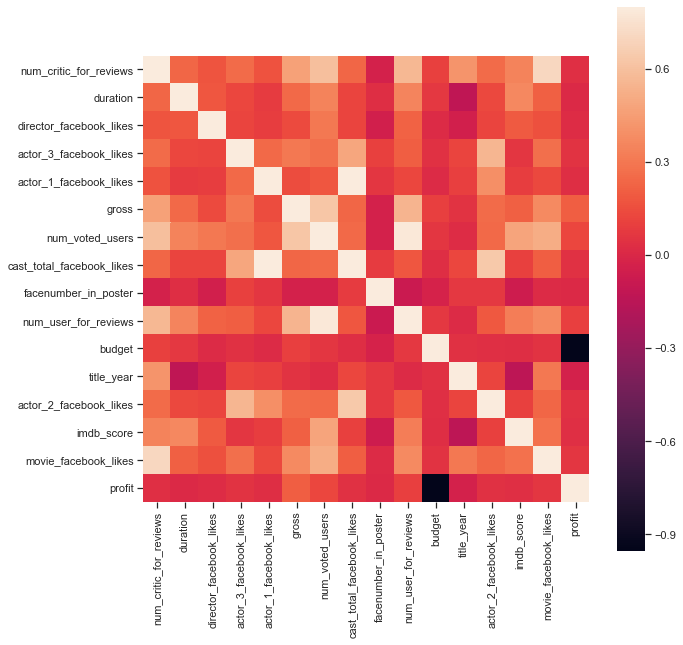

In [251]:
plt.figure(figsize=(10,10))
sns.heatmap(dfCom.corr(),vmax=.8, square=True)

# New Findings (Final Project)

## 1. Regression Analysis

### Import Packages

In [252]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

# model validation 
from sklearn.model_selection import train_test_split

In [253]:
#assigning columns to X and Y variables
y = dfCom['imdb_score'] 
X = dfCom.drop(['imdb_score','color','director_name','actor_2_name','actor_1_name', 'actor_3_name','plot_keywords','genres','movie_title','language','country','content_rating'], axis =1)

In [254]:
y.head(2)

0    7.9
1    7.1
Name: imdb_score, dtype: float64

In [255]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,523505847.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,9404152.0


In [256]:
# build a multiple regression model 

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [257]:
# model coeffcients 
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 2.59513022e-03  1.01158897e-02  3.09711076e-06  7.16185010e-05
  7.17993551e-05  5.76745630e+04  3.73598388e-06 -7.06831142e-05
 -2.31157978e-02 -6.31552009e-04 -5.76745630e+04 -2.21594601e-02
  7.43854171e-05 -2.03752222e-06 -5.76745630e+04]
y-intercept  49.32671838032334


In [258]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,num_critic_for_reviews,0.002595
1,duration,0.010116
2,director_facebook_likes,0.000003
3,actor_3_facebook_likes,0.000072
4,actor_1_facebook_likes,0.000072
5,gross,57674.563042
6,num_voted_users,0.000004
7,cast_total_facebook_likes,-0.000071
8,facenumber_in_poster,-0.023116
9,num_user_for_reviews,-0.000632


In [259]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '57674.563'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.023'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-57674.563'),
 ('title_year', '-0.022'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-57674.563')]

In [260]:
# Evaluating model 
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7158047920623787
variance or r-squared:  0.35864255181828497


### Statsmodel 

In [261]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'duration'), (1, 'facenumber_in_poster'), (2, 'title_year'), (3, 'num_critic_for_reviews'), (4, 'actor_3_facebook_likes'), (5, 'actor_2_facebook_likes'), (6, 'actor_1_facebook_likes'), (7, 'cast_total_facebook_likes'), (8, 'num_user_for_reviews'), (9, 'gross'), (10, 'budget'), (11, 'profit'), (12, 'num_voted_users'), (13, 'director_facebook_likes'), (14, 'movie_facebook_likes')]


#### Model 1 (All Features)

In [262]:
runs_reg_model1 = ols("imdb_score~duration+facenumber_in_poster+title_year+num_critic_for_reviews+actor_3_facebook_likes+actor_2_facebook_likes+actor_1_facebook_likes+cast_total_facebook_likes+num_user_for_reviews+gross+budget+profit+num_voted_users+director_facebook_likes+movie_facebook_likes",dfCom)
runs_reg1 = runs_reg_model1.fit()

In [263]:
print(runs_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:29:18   Log-Likelihood:                -4761.5
No. Observations:                3804   AIC:                             9553.
Df Residuals:                    3789   BIC:                             9647.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### Model 2 (Top 5 Features)

In [264]:
runs_reg_model2 = ols("imdb_score~duration+facenumber_in_poster+title_year+num_critic_for_reviews+actor_3_facebook_likes",dfCom)
runs_reg2 = runs_reg_model2.fit()

In [265]:
print(runs_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     272.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.50e-249
Time:                        22:29:19   Log-Likelihood:                -5023.6
No. Observations:                3804   AIC:                         1.006e+04
Df Residuals:                    3798   BIC:                         1.010e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61

#### Model 3 (Top 3 Features)

In [266]:
runs_reg_model3 = ols("imdb_score~duration+facenumber_in_poster+title_year",dfCom)
runs_reg3 = runs_reg_model3.fit()

In [267]:
print(runs_reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     215.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          8.11e-129
Time:                        22:29:21   Log-Likelihood:                -5308.3
No. Observations:                3804   AIC:                         1.062e+04
Df Residuals:                    3800   BIC:                         1.065e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               22.4555 

#### Statsmodel Evaluation 

- The r-squared for the best model is approx. 35% which indicates that it only explains 35% of the variance within the dataset. 
- As more features are subtracted from the model it begins to perform worse. 
- Almost all of the features in all 3 models are statistically significant base on their P>|t| values of 0.000

## 2. Classification Analysis 

### Import Packages

In [268]:
# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier


#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

In [269]:
# Creating column for score category 
bins = [0,4,6,8,10]
labels = ['bad','ok','good', 'excellent']
dfCom['score_cat'] = pd.cut(dfCom['imdb_score'], bins=bins, labels=labels)

C:\Users\Timot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [270]:
dfCom.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,score_cat
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,good
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,good
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,good
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,excellent
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,good


### Categorical to Dummy Variables

In [271]:
#mappling or replacing
dfCom = dfCom.replace({'score_cat': 'bad'}, {'score_cat': '0'})
dfCom = dfCom.replace({'score_cat': 'ok'}, {'score_cat': '1'})
dfCom = dfCom.replace({'score_cat': 'good'}, {'score_cat': '2'})
dfCom = dfCom.replace({'score_cat': 'excellent'}, {'score_cat': '3'})

In [272]:
dfCom.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,score_cat
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,2
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,2
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,2
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,3
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,2


In [273]:
df1 =  pd.get_dummies(dfCom, columns=["color", "language", "country", "content_rating"],
                         prefix=["color", "language", "country", "content_rating"],
                         drop_first=True)
df1.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,0,0,0,0,0,1,0,0,0,0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,0,0,0,0,0,1,0,0,0,0


### Decision Tree Classifier

In [274]:
# declare X variables and y variable

y = df1['score_cat']
X = df1.drop(['score_cat','director_name','actor_2_name','actor_1_name','actor_3_name','plot_keywords','genres','movie_title'], axis =1)
print(X.shape, y.shape)

(3804, 106) (3804,)


In [275]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head()

# Initialize DecisionTreeRegressor() ... name your decision model "dt"
dt = DecisionTreeClassifier()

# Train a decision tree model
dt = dt.fit(X_train,y_train)

In [276]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

1.0
--------------------------------------------------------
[[ 35   0   0   0]
 [  0 319   0   0]
 [  0   0 742   0]
 [  0   0   0  46]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       319
           2       1.00      1.00      1.00       742
           3       1.00      1.00      1.00        46

    accuracy                           1.00      1142
   macro avg       1.00      1.00      1.00      1142
weighted avg       1.00      1.00      1.00      1142

--------------------------------------------------------


### Logistic Regression

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)


print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))


C:\Users\Timot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6751313485113836
[[  0   1  26   0]
 [  0  10 312   0]
 [  0   5 741   2]
 [  0   0  25  20]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.62      0.03      0.06       322
           2       0.67      0.99      0.80       748
           3       0.91      0.44      0.60        45

    accuracy                           0.68      1142
   macro avg       0.55      0.37      0.36      1142
weighted avg       0.65      0.68      0.56      1142



C:\Users\Timot\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Results

- The decision tree classifier is the most accurate with an accuracy of 100% 
- The Logistic regression model failed to impress with it's accuracy of only 67.5%

## 3. Clustering 

### Import Packages 

In [278]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, ward

### K Means Analysis

In [279]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [280]:
k_means.fit(df1.drop(['score_cat','director_name','actor_2_name','actor_1_name','actor_3_name','plot_keywords','genres','movie_title'], axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [281]:
#clustering results
k_means.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [282]:
#To add cluster label into the dataset as a column
df2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2.head()

,cluster
0,0
1,0
2,0
3,0
4,3


In [283]:
# Joining Clustering data to original data
df1 = df.join(df2)
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,3.0


### Identifying Clusters (Profiling)

In [284]:
df1.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0.0,229.760504,116.987368,1005.220339,1291.743697,9908.968487,1.064584e+08,174598.256303,15846.894958,1.327004,547.970588,9.054146e+07,2005.682203,3224.306723,6.496008,2.213212,16471.331933
1.0,221.000000,107.000000,92.000000,358.000000,11000.000000,1.376601e+07,106111.000000,17627.000000,0.000000,181.000000,1.500000e+07,2011.000000,5000.000000,7.000000,2.350000,49000.000000
2.0,154.500000,103.750000,108.250000,453.000000,7627.250000,1.251112e+07,95041.250000,9205.500000,0.000000,316.750000,1.887500e+07,2004.500000,783.500000,7.025000,2.225000,4000.000000
3.0,147.646596,109.292572,768.710015,694.714933,7253.708384,4.871028e+07,90346.900181,10706.244270,1.427234,283.993652,4.183053e+07,2002.979636,1829.580012,6.426960,2.222464,7852.703860
4.0,94.857143,105.285714,32.285714,421.714286,5997.285714,3.482547e+07,41683.285714,7861.142857,1.714286,214.142857,2.200000e+07,1996.285714,818.285714,6.357143,1.982857,2592.857143


### Hierarchical Clustering Analysis

In [228]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

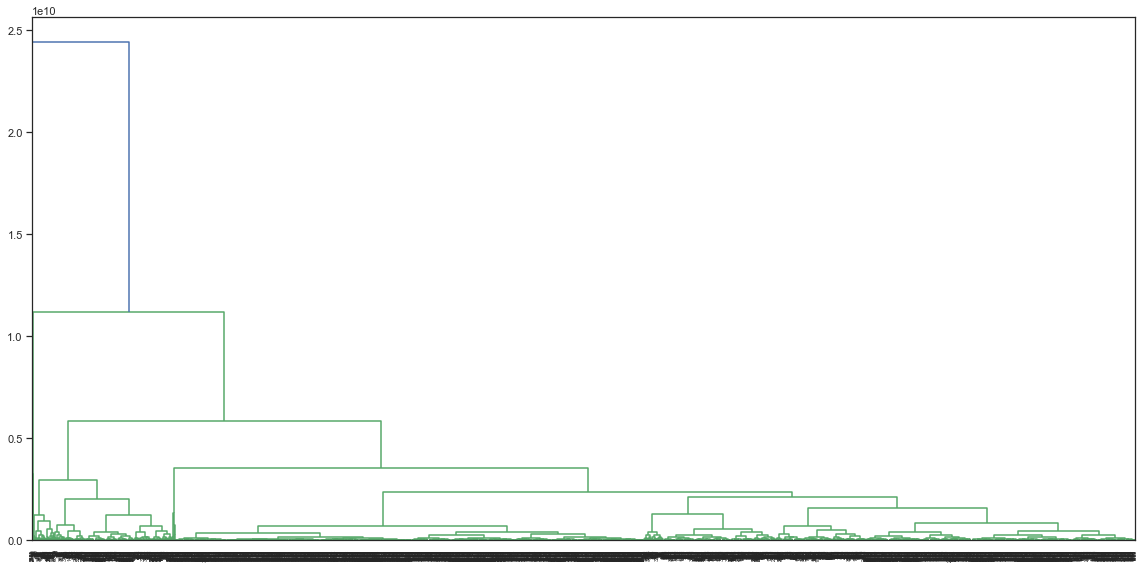

In [230]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

In [233]:
df3= pd.DataFrame(agg.labels_, columns = ['cluster'])
df3.head()

,cluster
0,1
1,1
2,1
3,1
4,0


In [234]:
df1 = df.join(df3)
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0.0


In [235]:
df1.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0.0,148.825023,109.327300,770.204000,694.200544,7299.079241,4.966212e+07,91622.547454,10761.435975,1.431071,286.816425,4.290296e+07,2003.022181,1844.316742,6.425218,2.214915,7844.483579
1.0,220.334029,116.624217,983.103376,1286.335417,9554.797917,9.990309e+07,164365.914583,15380.937500,1.305439,525.778706,8.288727e+07,2005.280591,3096.160417,6.506458,2.261353,16379.643750
2.0,154.500000,103.750000,108.250000,453.000000,7627.250000,1.251112e+07,95041.250000,9205.500000,0.000000,316.750000,1.887500e+07,2004.500000,783.500000,7.025000,2.225000,4000.000000
3.0,221.000000,107.000000,92.000000,358.000000,11000.000000,1.376601e+07,106111.000000,17627.000000,0.000000,181.000000,1.500000e+07,2011.000000,5000.000000,7.000000,2.350000,49000.000000


In [236]:
df1.groupby('cluster').size()

cluster
0.0    3319
1.0     480
2.0       4
3.0       1
dtype: int64

## 4. Findings 

Regression Analysis 
- We can see that the most important features in this dadta set according to regression analysis are:
    - Budget
    - Gross
    - Profit 
    - Duration
    - Actor 2 facebook likes
    - Cast total facebook likes 
   
- The intital model showed a MSE of only 0.71 which indicates a a strong model 
- This same model only provided a variance of 35.8% which tells us that it only explains the same amount of variance in the data
- Overall the intitaial model is not a good one
- The statsmodels provided similar results
- The first statsmodel model also only had an r squared value of 36% 
- The initial statsmodel was the best performing model 
- Each model following the original was progressively less accurate 
- This is due to the removal of statistically important features 
- Most of the features in this data set were considered important 


Classification Analysis 
- The initial model used in this section was a decision tree classifier 
- In order for this model to function correctly it was neccesary to remove all categorical data that could not be feasibly turned into dummy variables 
- Examples of this are actor and director names 
- The decision tree classifier model yieled 100% accuracy
- This is likely not to be 100% accurate in practice though 
- The next model used was logistic regression 
- This model did not perform well in comparison to the DTC 
- It is interesting to note that it was 0% accurate for predicting bad movies 
- As the quality of movie imporved, so did the model's accuracy 
- It was most succesful at predicting excellent quality movies 
- It had an overall accuracy of 67% 


Clustering Analysis 
- The first method of clustering analysis used was K Means analysis 
- This method also required dropping the categorical variables which could not be converted into dummy variables 

Cluster Profiles (K Means) 
- [0] These movies tend to be longer and have a high number of critic reviews and a high number of likes on facebook for the director and lead actor 
- [1] These movies are most noted for having a very popular lead actor and are very popular on facebook as a whole. They also tend to be newer films. 
- [2] These movies are the shortest movies and are also the least popular among people on facebook but tend to be the highest rating on IMDB 
- [3] These movies are longer and have more likes for the director. They also are the third most popular on facebook 
- [4] These movies are short and have few critic reviews and have the least number of likes on facebook for the whole cast. This is the least popular category on IMDB 

Cluster Profiles (Hierarchical Analysis) 
- [0] This is the lowest rated cluster. These movies have a small popularity on facebook and an average number of users reviewing it 
- [1] These movies also tend to have a low IMDB score but are more popular on facebook and have a popular lead actor 
- [2] This is the highest rated cluster on IMDB but also have the lowest number of facebook likes. These movies are likely independant films 
- [3] These movies are also rated above average on IMDB but have the smallest budget and the most likes on facebook 